In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)
matches = pd.read_csv('IPL Matches 2008-2020.csv')
balls = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

0.10.1


In [2]:
data = pd.merge(left=matches, right=balls, on='id', how='right')
data.shape

(193468, 34)

In [3]:
data = data.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants')
data = data.replace(to_replace='Royal Challengers Bangalore',value='RCB')
data = data.replace(to_replace='Kolkata Knight Riders',value='KKR')
data = data.replace(to_replace='Mumbai Indians',value='MI')
data = data.replace(to_replace='Rajasthan Royals',value='RR')
data = data.replace(to_replace='Kings XI Punjab',value='KXIP')
data = data.replace(to_replace='Delhi Daredevils',value='DD')
data = data.replace(to_replace='Deccan Chargers',value='DC')
data = data.replace(to_replace='Chennai Super Kings',value='CSK')
data = data.replace(to_replace='Pune Warriors India',value='PWI')
data = data.replace(to_replace='Kochi Tuskers Kerala',value='KTK')
data = data.replace(to_replace='Sunrisers Hyderabad',value='SRH')
data = data.replace(to_replace='Rising Pune Supergiants',value='RPSG')
data = data.replace(to_replace='Gujarat Lions',value='GL')
data = data.replace(to_replace='Delhi Capitals',value='DCA')
data = data.replace(to_replace='Pune Warriors',value='PWI')

data.head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,...,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB


In [4]:
data.isnull().sum()

id                       0
city                  3139
date                     0
player_of_match        372
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                 372
result_margin         3597
eliminator             372
method              190260
umpire1                  0
umpire2                  0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [6]:
balls['dismissal_kind'].fillna('Not a wicket', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                193468 non-null  int64  
 1   city              190329 non-null  object 
 2   date              193468 non-null  object 
 3   player_of_match   193096 non-null  object 
 4   venue             193468 non-null  object 
 5   neutral_venue     193468 non-null  int64  
 6   team1             193468 non-null  object 
 7   team2             193468 non-null  object 
 8   toss_winner       193468 non-null  object 
 9   toss_decision     193468 non-null  object 
 10  winner            193096 non-null  object 
 11  result            193096 non-null  object 
 12  result_margin     189871 non-null  float64
 13  eliminator        193096 non-null  object 
 14  method            3208 non-null    object 
 15  umpire1           193468 non-null  object 
 16  umpire2           19

In [8]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year

In [9]:
data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'inning',
       'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team', 'year'],
      dtype='object')

In [170]:
wickets_by_year = data.groupby(by='year').sum()['is_wicket']
wickets_by_year = pd.DataFrame(wickets_by_year)
wickets_by_year.reset_index(inplace=True)

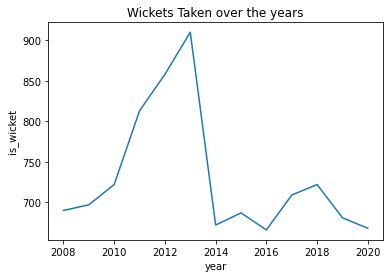

In [183]:
sns.lineplot(data=wickets_by_year, x='year', y='is_wicket')
plt.title('Wickets Taken over the years')
plt.show()

In [184]:
runs_by_year = data.groupby(by='year').sum()['total_runs']
runs_by_year = pd.DataFrame(runs_by_year)
runs_by_year.reset_index(inplace=True)

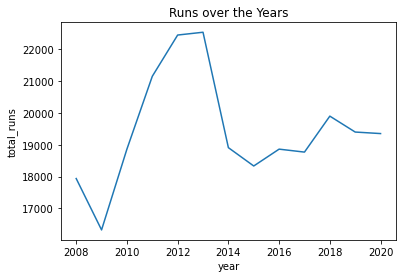

In [185]:
sns.lineplot(data=runs_by_year, x='year', y='total_runs')
plt.title('Runs over the Years')
plt.show()

In [5]:
wickets_by_team = data.groupby(by='bowling_team').sum()['is_wicket']
wickets_by_team = pd.DataFrame(wickets_by_team)
wickets_by_team.reset_index(inplace=True)

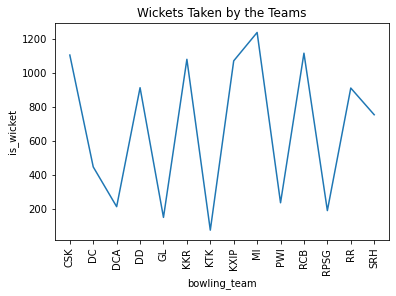

In [6]:
sns.lineplot(data=wickets_by_team, x='bowling_team', y='is_wicket')
plt.title('Wickets Taken by the Teams')
plt.xticks(rotation=90)
plt.show()

In [189]:
runs_by_team = data.groupby(by='batting_team').sum()['total_runs']
runs_by_team = pd.DataFrame(runs_by_team)
runs_by_team.reset_index(inplace=True)

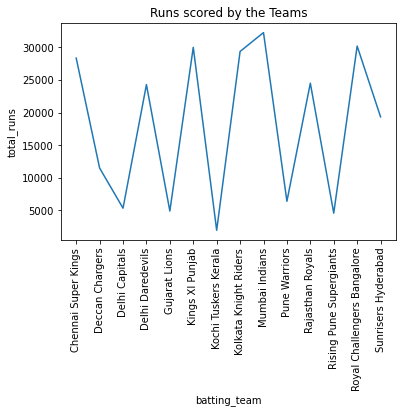

In [230]:
sns.lineplot(data=runs_by_team, x='batting_team', y='total_runs')
plt.title('Runs scored by the Teams')
plt.xticks(rotation=90)
plt.show()

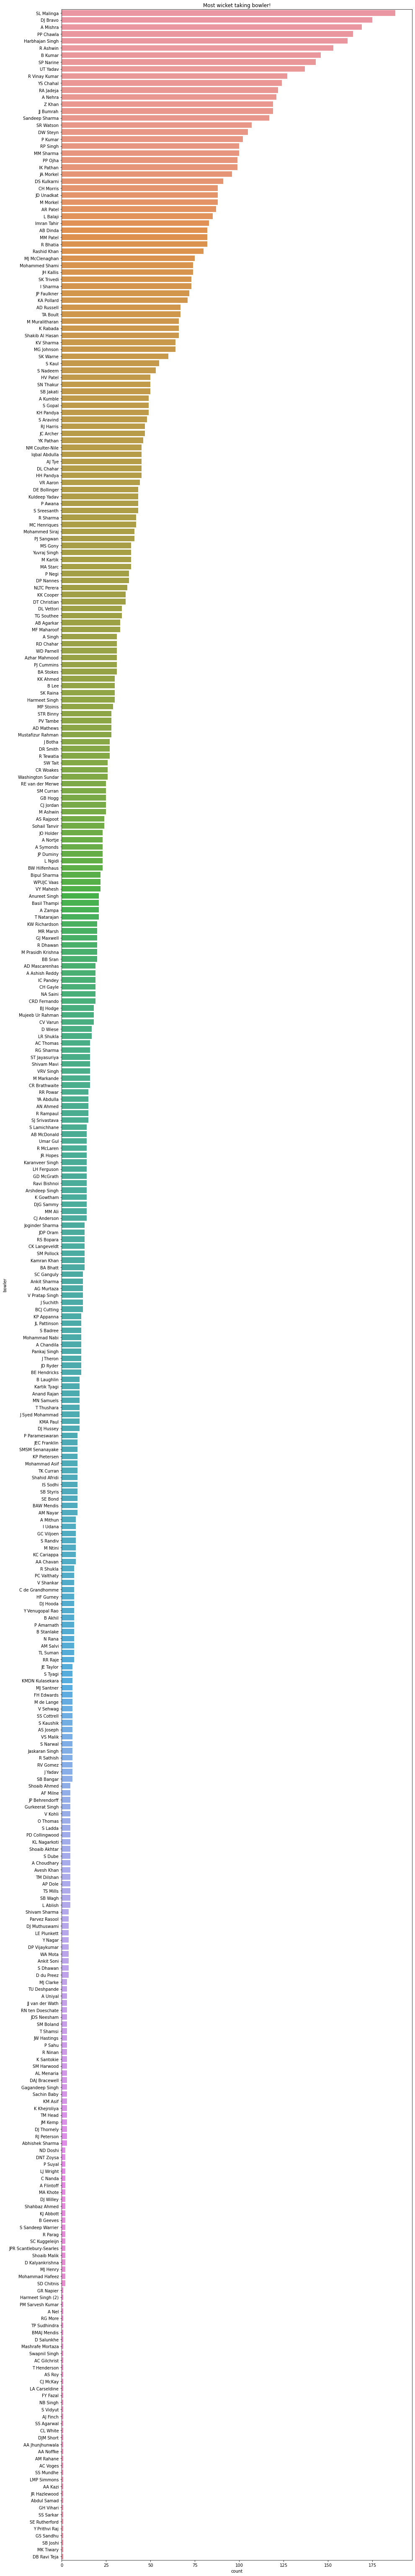

In [56]:
plt.figure(figsize=(15,112))
sns.countplot(y=balls[balls['dismissal_kind'] != 'Not a wicket']['bowler'],
              order=balls[balls['dismissal_kind'] != 'Not a wicket']['bowler'].value_counts().index)
plt.title('Most wicket taking bowler!')
plt.show()

In [57]:
data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'inning',
       'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

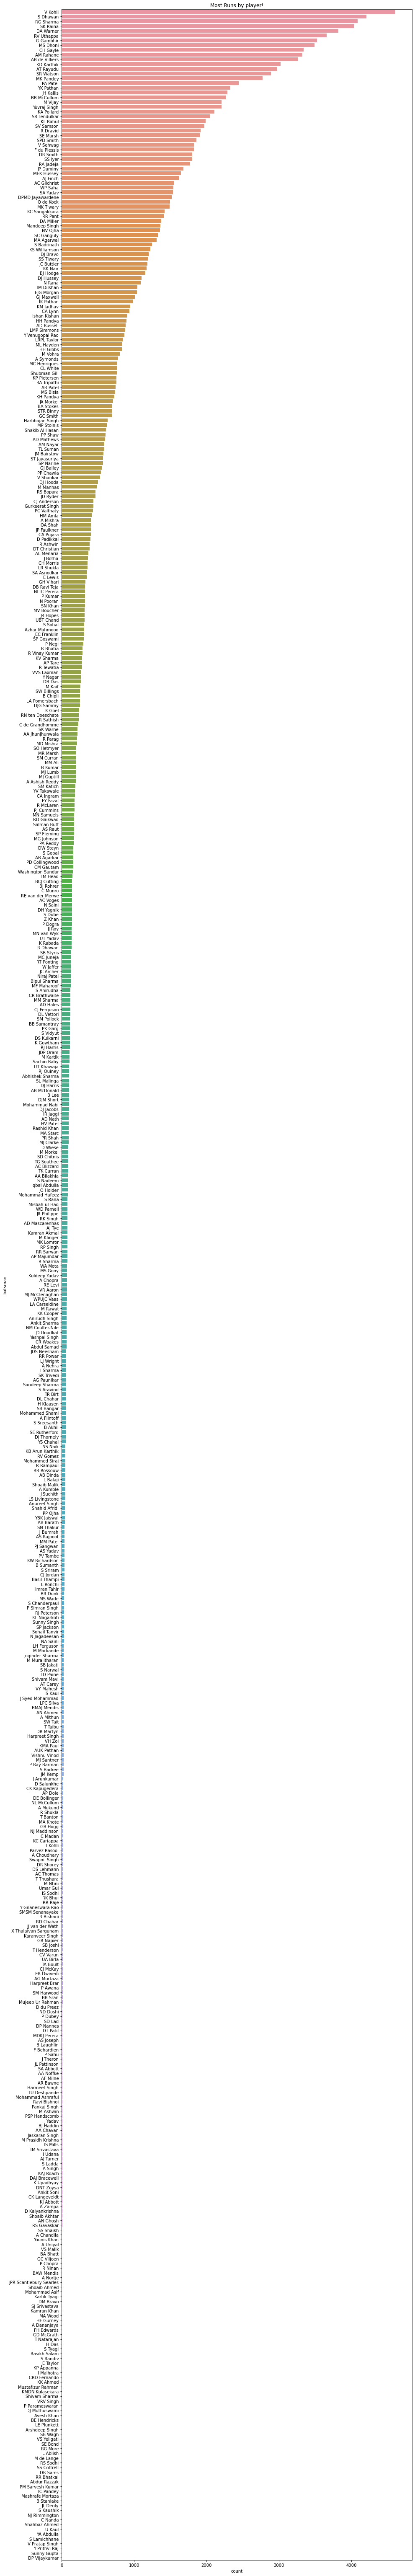

In [65]:
plt.figure(figsize=(15,112))
sns.countplot(y=balls[balls['batsman_runs'] != 'Not a wicket']['batsman'],
              order=balls[balls['batsman_runs'] != 'Not a wicket']['batsman'].value_counts().index)
plt.title('Most Runs by a player!')
plt.show()

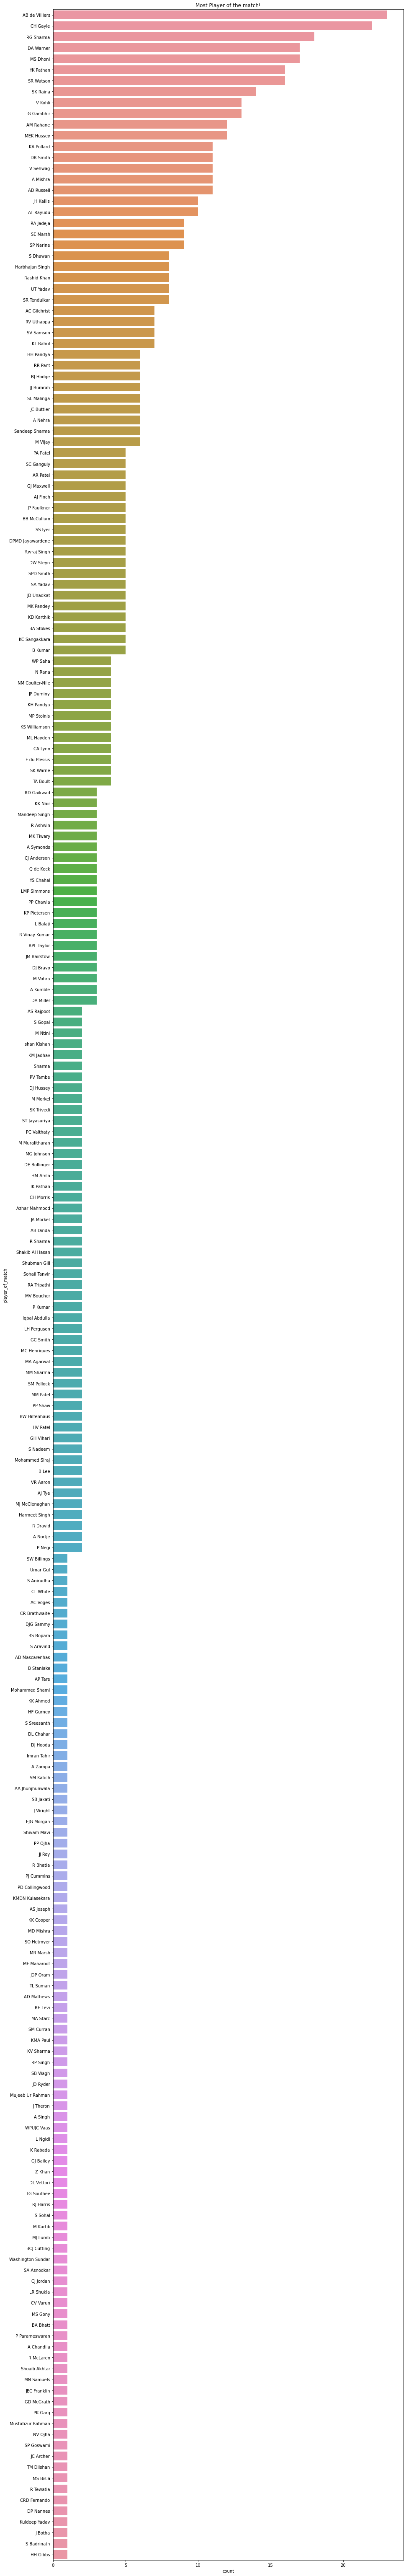

In [72]:
plt.figure(figsize=(15,112))
sns.countplot(y=matches[matches['id'] != '0']['player_of_match'],
              order=matches[matches['id'] != '0']['player_of_match'].value_counts().index)
plt.title('Most Player of the match!')
plt.show()

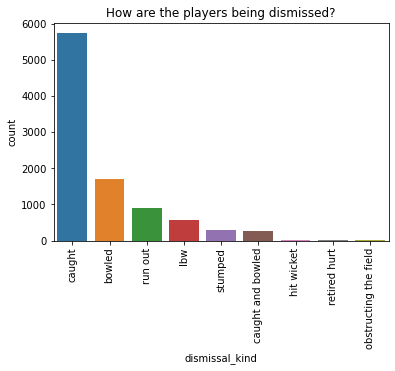

In [253]:
sns.countplot(x=balls[balls['dismissal_kind'] != 'Not a wicket']['dismissal_kind'],
              order=balls[balls['dismissal_kind'] != 'Not a wicket']['dismissal_kind'].value_counts().index)
plt.title('How are the players being dismissed?')
plt.xticks(rotation=90)
plt.show()